### Indexing and selection of subsets in GriddedData by dimension names using the `isel` method

The `pyaerocom.GriddedData` object is based on the `Cube` object of the `iris` library, which does not provide as intuitive indexing and subsetting methods as xarray does. 

See here for anintroduction into the related iris API (based on `iris.Constraint` class):

https://scitools.org.uk/iris/docs/v2.0/userguide/subsetting_a_cube.html#subsetting-a-cube

And here for the xarray equivalent:

http://xarray.pydata.org/en/stable/indexing.html#indexing-and-selecting-data

The latter (xarray) allows for things like::

```
subset = data.isel(longitude=12, latitude=slice(10, 20))
```

which is very convenient to extract certain locations. In pyaerocom, this needs to be done all the time, since very often, model data is supposed to be colocated with observations from certain lat / lon coorinate locations. Doing such an extraction with `iris.Constraints` can be painful, therefore, a wrapper method `isel` was implemented, which can be used like the equivalent method in xarray and which is introduced in the following.

In [1]:
import pyaerocom as pya

Initating pyaerocom configuration
Checking server configuration ...
Init data paths for lustre
Expired time: 0.010 s


In [2]:
r = pya.io.ReadGridded('CAM5.3-Oslo_AP3-CTRL2016-PD')
print(r)


Pyaerocom ReadGridded
---------------------
Model ID: CAM5.3-Oslo_AP3-CTRL2016-PD
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III/CAM5.3-Oslo_AP3-CTRL2016-PD/renamed
Available variables: ['abs440aer', 'abs440aercs', 'abs500aer', 'abs5503Daer', 'abs550aer', 'abs550bc', 'abs550dryaer', 'abs550dust', 'abs550oa', 'abs550so4', 'abs550ss', 'abs670aer', 'abs870aer', 'airmass', 'area', 'asy3Daer', 'bc5503Daer', 'ccn0c02p', 'ccn0c05p', 'ccn0c10p', 'ccn0c20p', 'ccn0c50p', 'ccn1c00p', 'cheaqpso4', 'chegpso4', 'chepso2', 'cl3D', 'cldnci', 'cldncl', 'clt', 'cltl', 'drybc', 'drydms', 'drydust', 'dryoa', 'dryso2', 'dryso4', 'dryss', 'ec5503Daer', 'ec550dryaer', 'emibc', 'emidms', 'emidust', 'emioa', 'emiso2', 'emiso4', 'emiss', 'hus', 'landf', 'loadbc', 'loaddms', 'loaddust', 'loadoa', 'loadso2', 'loadso4', 'loadss', 'mmraerh2o', 'mmrbc', 'mmrdu', 'mmroa', 'mmrso4', 'mmrss', 'od440aer', 'od440csaer', 'od550aer', 'od550aerh2o', 'od550bc', 'od550csaer', 'od550du

In [3]:
data = r.read_var('ec5503Daer')
data

/home/jonasg/anaconda3/lib/python3.6/site-packages/iris/fileformats/cf.py:557: UserWarning: Missing CF-netCDF formula term variable 'hyam', referenced by netCDF variable 'lev'
  warnings.warn(message % (variable_name, nc_var_name))
/home/jonasg/anaconda3/lib/python3.6/site-packages/iris/fileformats/cf.py:557: UserWarning: Missing CF-netCDF formula term variable 'hybm', referenced by netCDF variable 'lev'
  warnings.warn(message % (variable_name, nc_var_name))
/home/jonasg/anaconda3/lib/python3.6/site-packages/iris/fileformats/cf.py:557: UserWarning: Missing CF-netCDF formula term variable 'P0', referenced by netCDF variable 'lev'
  warnings.warn(message % (variable_name, nc_var_name))
/home/jonasg/anaconda3/lib/python3.6/site-packages/iris/fileformats/cf.py:557: UserWarning: Missing CF-netCDF formula term variable 'PS', referenced by netCDF variable 'lev'
  warnings.warn(message % (variable_name, nc_var_name))
/home/jonasg/anaconda3/lib/python3.6/site-packages/iris/fileformats/_pyke_ru

pyaerocom.GriddedData
Grid data: <iris 'Cube' of aerosol extinction coefficient / (1/Mm) (time: 12; atmosphere_hybrid_sigma_pressure_coordinate: 30; latitude: 192; longitude: 288)>

#### Display coordinate arrays

In [4]:
data.longitude

DimCoord(array([-180.  , -178.75, -177.5 , -176.25, -175.  , -173.75, -172.5 ,
       -171.25, -170.  , -168.75, -167.5 , -166.25, -165.  , -163.75,
       -162.5 , -161.25, -160.  , -158.75, -157.5 , -156.25, -155.  ,
       -153.75, -152.5 , -151.25, -150.  , -148.75, -147.5 , -146.25,
       -145.  , -143.75, -142.5 , -141.25, -140.  , -138.75, -137.5 ,
       -136.25, -135.  , -133.75, -132.5 , -131.25, -130.  , -128.75,
       -127.5 , -126.25, -125.  , -123.75, -122.5 , -121.25, -120.  ,
       -118.75, -117.5 , -116.25, -115.  , -113.75, -112.5 , -111.25,
       -110.  , -108.75, -107.5 , -106.25, -105.  , -103.75, -102.5 ,
       -101.25, -100.  ,  -98.75,  -97.5 ,  -96.25,  -95.  ,  -93.75,
        -92.5 ,  -91.25,  -90.  ,  -88.75,  -87.5 ,  -86.25,  -85.  ,
        -83.75,  -82.5 ,  -81.25,  -80.  ,  -78.75,  -77.5 ,  -76.25,
        -75.  ,  -73.75,  -72.5 ,  -71.25,  -70.  ,  -68.75,  -67.5 ,
        -66.25,  -65.  ,  -63.75,  -62.5 ,  -61.25,  -60.  ,  -58.75,
        -57

In [5]:
data.latitude

DimCoord(array([-90.        , -89.05759162, -88.11518325, -87.17277487,
       -86.23036649, -85.28795812, -84.34554974, -83.40314136,
       -82.46073298, -81.51832461, -80.57591623, -79.63350785,
       -78.69109948, -77.7486911 , -76.80628272, -75.86387435,
       -74.92146597, -73.97905759, -73.03664921, -72.09424084,
       -71.15183246, -70.20942408, -69.26701571, -68.32460733,
       -67.38219895, -66.43979058, -65.4973822 , -64.55497382,
       -63.61256545, -62.67015707, -61.72774869, -60.78534031,
       -59.84293194, -58.90052356, -57.95811518, -57.01570681,
       -56.07329843, -55.13089005, -54.18848168, -53.2460733 ,
       -52.30366492, -51.36125654, -50.41884817, -49.47643979,
       -48.53403141, -47.59162304, -46.64921466, -45.70680628,
       -44.76439791, -43.82198953, -42.87958115, -41.93717277,
       -40.9947644 , -40.05235602, -39.10994764, -38.16753927,
       -37.22513089, -36.28272251, -35.34031414, -34.39790576,
       -33.45549738, -32.51308901, -31.5706806

In [6]:
time = data['time']
time

DimCoord(array([  0.,  31.,  59.,  90., 120., 151., 181., 212., 243., 273., 304.,
       334.]), standard_name='time', units=Unit('days since 2010-01-01 00:00:00', calendar='gregorian'))

#### Define some example coordinates used to extract a profile

In [7]:
lon = 110.1111
lat = 84.12345
t = data.start + np.timedelta64(180, 'D')

#### Find coordinate indices that are closest to the above coordinate

In [8]:
idx = data.find_closest_index(longitude=lon, latitude=lat, time=t)
idx

{'longitude': 232, 'latitude': 185, 'time': 6}

##### Make sure the method `find_closest_index` worked properly

In [9]:
print('Closest coordinates\n'
      'Lat: {} (in: {}, diff: {:.2f})\n'
      'Lon: {} (in: {}, diff: {:.2f})\n'
      'Time: {} (in {}, diff: {})\n'
      .format(data.longitude.points[idx['longitude']], lon, data.longitude.points[idx['longitude']] - lon,
              data.latitude.points[idx['latitude']], lat, data.latitude.points[idx['latitude']] - lat,
              data.time_stamps()[idx['time']], t, str(data.time_stamps()[idx['time']] - t)))

Closest coordinates
Lat: 110.0 (in: 110.1111, diff: -0.11)
Lon: 84.34554973821989 (in: 84.12345, diff: 0.22)
Time: 2010-07-01T00:00:00.000000 (in 2010-06-30T00:00:00.000000, diff: 86400000000 microseconds)



### Use the `isel` method to subset the data directly

In [10]:
try:
    subset = data.isel(longitude=lon, latitude=lat, time=t, use_neirest=False)
except pya.exceptions.DataExtractionError as e:
    print(repr(e))
    subset = data.isel(longitude=lon, latitude=lat, time=t, use_neirest=True)
print(subset)

DataExtractionError('No such value 110.1111 in dim longitudeUse option use_neirest to disregard and extract neirest neighbour',)
pyaerocom.GriddedData: CAM5.3-Oslo_AP3-CTRL2016-PD
Grid data: aerosol extinction coefficient / (1/Mm) (atmosphere_hybrid_sigma_pressure_coordinate: 30)
     Dimension coordinates:
          atmosphere_hybrid_sigma_pressure_coordinate                               x
     Scalar coordinates:
          latitude: 84.34554973821989 degrees
          longitude: 110.0 degrees
          time: 2010-07-01 00:00:00
     Attributes:
          Conventions: CF-1.0
          NCO: 4.3.7
          Version: $Name$
          case: 53OSLO_PD_UNTUNED
          history: Mon Feb 20 14:49:21 2017: ncatted -O -a units,ec5503Daer,o,c,m-1 /scratch/kirkevag/aerocom/aerocom3_CAM5.3-Oslo_AP3-CTRL2016-PD_ec5503Daer_ModelLevel_2010_monthly.nc
Mon...
          host: hexagon-1
          initial_file: /work/shared/noresm/inputdata/atm/cam/inic/fv/cami-mam3_0000-01-01_0.9...
          logname: 

#### Test isel combination of range specification and nearest values

In [11]:
sub2 = data.isel(time=t, longitude=(lon-30, lon+30), latitude=lat)
print(sub2)

pyaerocom.GriddedData: CAM5.3-Oslo_AP3-CTRL2016-PD
Grid data: aerosol extinction coefficient / (1/Mm) (atmosphere_hybrid_sigma_pressure_coordinate: 30; longitude: 48)
     Dimension coordinates:
          atmosphere_hybrid_sigma_pressure_coordinate                               x              -
          longitude                                                                 -              x
     Scalar coordinates:
          latitude: 84.34554973821989 degrees
          time: 2010-07-01 00:00:00
     Attributes:
          Conventions: CF-1.0
          NCO: 4.3.7
          Version: $Name$
          case: 53OSLO_PD_UNTUNED
          history: Mon Feb 20 14:49:21 2017: ncatted -O -a units,ec5503Daer,o,c,m-1 /scratch/kirkevag/aerocom/aerocom3_CAM5.3-Oslo_AP3-CTRL2016-PD_ec5503Daer_ModelLevel_2010_monthly.nc
Mon...
          host: hexagon-1
          initial_file: /work/shared/noresm/inputdata/atm/cam/inic/fv/cami-mam3_0000-01-01_0.9...
          logname: ihkarset
          mdims: 1
     

In [12]:
sub3 = sub2.isel(longitude = lon)
print(sub3)

pyaerocom.GriddedData: CAM5.3-Oslo_AP3-CTRL2016-PD
Grid data: aerosol extinction coefficient / (1/Mm) (atmosphere_hybrid_sigma_pressure_coordinate: 30)
     Dimension coordinates:
          atmosphere_hybrid_sigma_pressure_coordinate                               x
     Scalar coordinates:
          latitude: 84.34554973821989 degrees
          longitude: 110.0 degrees
          time: 2010-07-01 00:00:00
     Attributes:
          Conventions: CF-1.0
          NCO: 4.3.7
          Version: $Name$
          case: 53OSLO_PD_UNTUNED
          history: Mon Feb 20 14:49:21 2017: ncatted -O -a units,ec5503Daer,o,c,m-1 /scratch/kirkevag/aerocom/aerocom3_CAM5.3-Oslo_AP3-CTRL2016-PD_ec5503Daer_ModelLevel_2010_monthly.nc
Mon...
          host: hexagon-1
          initial_file: /work/shared/noresm/inputdata/atm/cam/inic/fv/cami-mam3_0000-01-01_0.9...
          logname: ihkarset
          mdims: 1
          nco_openmp_thread_number: 1
          revision_Id: $Id$
          source: CAM
          tit

#### Check if the index extraction worked

In [13]:
data.coords_order

['time',
 'atmosphere_hybrid_sigma_pressure_coordinate',
 'latitude',
 'longitude']

Use closest indices extracted above.

In [14]:
profile0 = subset[:].grid.data
profile1 = data[idx['time'], :, idx['latitude'], idx['longitude']].grid.data
profile2 = sub3[:].grid.data

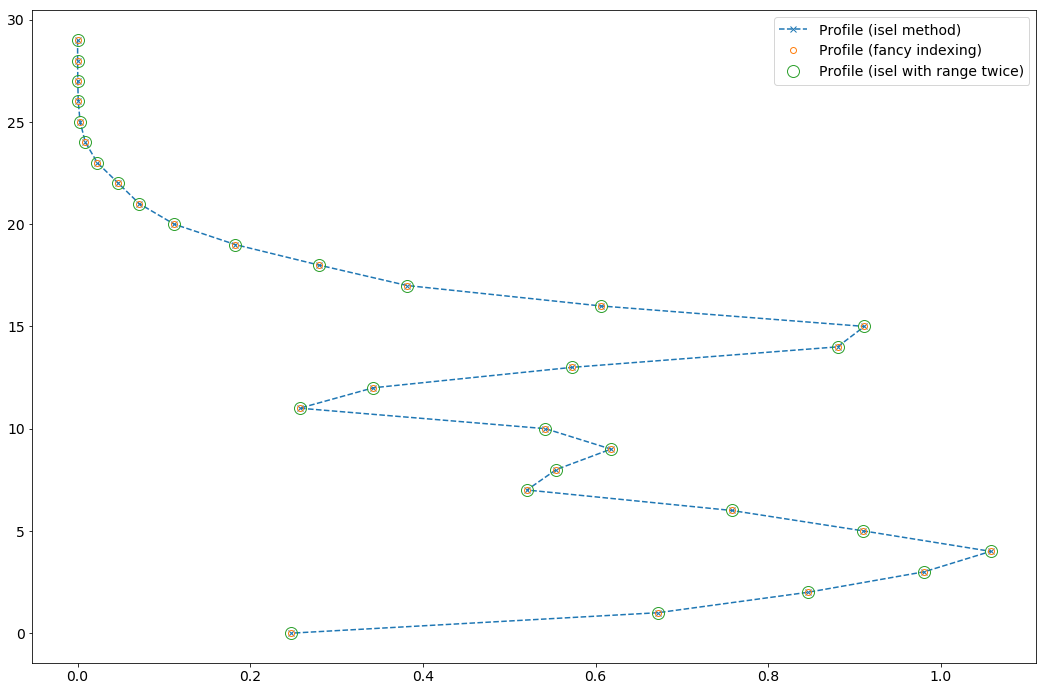

In [15]:
levs = np.arange(len(profile0))[::-1]
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
plt.plot(profile0, levs, '--x', label='Profile (isel method)')
plt.plot(profile1, levs, ' o', mfc='none', label='Profile (fancy indexing)')
plt.plot(profile2, levs, ' o', ms=12, mfc='none', label='Profile (isel with range twice)')
plt.legend()

In [16]:
data.to_time_series(latitude=[lat], longitude=[lon], vert_scheme='surface')

Interpolating data of shape (12, 192, 288). This may take a while.
Successfully interpolated cube


[StationData([('dtime', []),
              ('var_info', BrowseDict()),
              ('errs', BrowseDict()),
              ('overlap', BrowseDict()),
              ('station_name', None),
              ('instrument_name', None),
              ('PI', None),
              ('filename', None),
              ('ts_type', None),
              ('latitude', 84.12345),
              ('longitude', 110.1111),
              ('altitude', nan),
              ('data_id', 'CAM5.3-Oslo_AP3-CTRL2016-PD'),
              ('dataset_name', None),
              ('data_product', None),
              ('data_version', None),
              ('data_level', None),
              ('revision_date', None),
              ('ts_type_src', None),
              ('ec550aer', 2010-01-01    0.105719
               2010-02-01    0.300468
               2010-03-01    0.506965
               2010-04-01    0.392774
               2010-05-01    0.178510
               2010-06-01    0.678934
               2010-07-01    0.247605
    